<a href="https://colab.research.google.com/github/ccubc/DS_self_learning/blob/master/deep_learning/7_NLP_text_predicting_with_sequence_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [3]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
  -O /tmp/irish-lyrics-eof.txt

--2020-01-04 06:27:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2020-01-04 06:27:14 (161 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [0]:
tokenizer = Tokenizer()

In [0]:
data = open('/tmp/irish-lyrics-eof.txt').read()

In [7]:
corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [0]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding = 'pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # one-hot encoding y (predicted word)


In [9]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['in'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
8
71
6
713
39
1790
1791


In [10]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [11]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [12]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [13]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [14]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(lr=0.01) # learning rate
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history = model.fit(xs, ys, epochs = 100, verbose = 1)

Train on 12038 samples
Epoch 1/100
12038/12038 [==============================] - 12s 998us/sample - loss: 6.6451 - accuracy: 0.0730
Epoch 2/100
12038/12038 [==============================] - 4s 349us/sample - loss: 5.7427 - accuracy: 0.1123
Epoch 3/100
12038/12038 [==============================] - 4s 346us/sample - loss: 4.8686 - accuracy: 0.1676
Epoch 4/100
12038/12038 [==============================] - 4s 345us/sample - loss: 3.9527 - accuracy: 0.2347
Epoch 5/100
12038/12038 [==============================] - 4s 341us/sample - loss: 3.0891 - accuracy: 0.3394
Epoch 6/100
12038/12038 [==============================] - 4s 346us/sample - loss: 2.3991 - accuracy: 0.4591
Epoch 7/100
12038/12038 [==============================] - 4s 337us/sample - loss: 1.9043 - accuracy: 0.5529
Epoch 8/100
12038/12038 [==============================] - 4s 337us/sample - loss: 1.5594 - accuracy: 0.6278
Epoch 9/100
12038/12038 [==============================] - 4s 333us/sample - loss: 1.3336 - accuracy: 0.

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

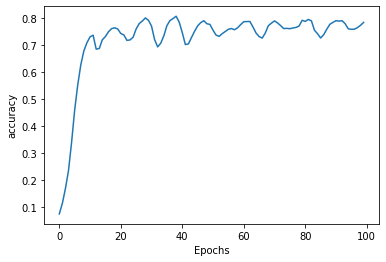

In [18]:
plot_graphs(history, 'accuracy')

In [24]:
seed_text = 'I see trees of green red roses too'
next_words = 100
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = 'pre')
  predicted = model.predict_classes(token_list, verbose = 0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

I see trees of green red roses too said old dreams and liffey and from them along the high rocky road twill lass down to right leg friends and fine fulfill gone gone bit him marched in grim array a earnest stalwart band love whos in his more leg sun sets oer the barley nor wheat we did stray in him my mind being bent gone gone nor too ra on her fingers and bells on her toes in me dwelling and pride from eyes gone gone lanigans ball again again wid the rest wid the roses in woe spancil hill and seven id had tree o gone


## Character-based RNN

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time

#### Download the Shakespeare dataset

In [26]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


#### Read the data

In [27]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [28]:
print(text[:250])


First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [29]:
# The unique characters in the file
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

65 unique characters


#### Process the text
##### Vectorize the text

In [0]:
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

Now we have an integer representation for each character. Notice that we mapped the character as indexes from 0 to len(unique).

In [31]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')


{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [32]:
# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))


'First Citizen' ---- characters mapped to int ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


#### The prediction task
Given a character, or a sequence of characters, what is the most probable next character? This is the task we're training the model to perform. The input to the model will be a sequence of characters, and we train the model to predict the output—the following character at each time step.<br>

Since RNNs maintain an internal state that depends on the previously seen elements, given all the characters computed until this moment, what is the next character?

#### Create training examples and targets

Next divide the text into example sequences. Each input sequence will contain seq_length characters from the text.<br>

For each input sequence, the corresponding targets contain the same length of text, except shifted one character to the right.<br>

So break the text into chunks of seq_length+1. For example, say seq_length is 4 and our text is "Hello". The input sequence would be "Hell", and the target sequence "ello".<br>

To do this first use the tf.data.Dataset.from_tensor_slices function to convert the text vector into a stream of character indices.

In [33]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


The batch method lets us easily convert these individual characters to sequences of the desired size.

In [34]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))


'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


For each sequence, duplicate and shift it to form the input and target text by using the map method to apply a simple function to each batch:

In [0]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

Print the first examples input and target values:


In [36]:
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


Each index of these vectors are processed as one time step. For the input at time step 0, the model receives the index for "F" and trys to predict the index for "i" as the next character. At the next timestep, it does the same thing but the RNN considers the previous step context in addition to the current input character.

In [37]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 18 ('F')
  expected output: 47 ('i')
Step    1
  input: 47 ('i')
  expected output: 56 ('r')
Step    2
  input: 56 ('r')
  expected output: 57 ('s')
Step    3
  input: 57 ('s')
  expected output: 58 ('t')
Step    4
  input: 58 ('t')
  expected output: 1 (' ')


#### Create training batches
We used tf.data to split the text into manageable sequences. But before feeding this data into the model, we need to shuffle the data and pack it into batches.

In [38]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

#### Build The Model
Use tf.keras.Sequential to define the model. For this simple example three layers are used to define our model:

* tf.keras.layers.Embedding: The input layer. A trainable lookup table that will map the numbers of each character to a vector with embedding_dim dimensions;
* tf.keras.layers.GRU: A type of RNN with size units=rnn_units (You can also use a LSTM layer here.)
* tf.keras.layers.Dense: The output layer, with vocab_size outputs.

In [0]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [0]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model


In [0]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)


#### Try the model

In [42]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In the above example the sequence length of the input is 100 but the model can be run on inputs of any length:



In [43]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (64, None, 256)           16640     
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense_1 (Dense)              (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [0]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [45]:
sampled_indices

array([53, 52, 58, 47,  2, 34, 27, 22, 46, 16, 47, 10, 18, 60, 25, 58, 57,
        7, 36, 22, 45,  9, 57, 28, 50, 32, 59, 12, 51, 10, 43, 39, 59, 41,
       27, 36, 18, 61,  5, 44, 56,  0, 18, 47, 55, 52, 53, 18,  6, 40, 37,
       31, 59, 48,  1, 30,  7,  8,  0, 43, 51, 12,  3, 40, 10, 54, 35, 37,
       57,  4, 38, 63, 54, 29, 24, 57, 43, 53, 37, 52, 53, 21, 36, 13, 35,
       15, 54, 28, 30, 31,  1, 24, 39, 35, 14, 16, 53, 25, 57, 19])

In [46]:
# Decode these to see the text predicted by this untrained model:
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Input: 
 "ease\nyou, deliver.\n\nMENENIUS:\nThere was a time when all the body's members\nRebell'd against the bell"

Next Char Predictions: 
 "onti!VOJhDi:FvMts-XJg3sPlTu?m:eaucOXFw'fr\nFiqnoF,bYSuj R-.\nem?$b:pWYs&ZypQLseoYnoIXAWCpPRS LaWBDoMsG"


#### Train the model
At this point the problem can be treated as a standard classification problem. Given the previous RNN state, and the input this time step, predict the class of the next character.

#### Attach an optimizer, and a loss function
The standard tf.keras.losses.sparse_categorical_crossentropy loss function works in this case because it is applied across the last dimension of the predictions.<br>

Because our model returns logits, we need to set the from_logits flag.

In [47]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.1733356


Configure the training procedure using the tf.keras.Model.compile method. We'll use tf.keras.optimizers.Adam with default arguments and the loss function.



In [0]:
model.compile(optimizer='adam', loss=loss)


#### Configure checkpoints
Use a tf.keras.callbacks.ModelCheckpoint to ensure that checkpoints are saved during training:

In [0]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

#### Execute the training
To keep training time reasonable, use 10 epochs to train the model. In Colab, set the runtime to GPU for faster training.

In [50]:
EPOCHS=10
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])


Train for 172 steps
Epoch 1/10
172/172 [==============================] - 10s 58ms/step - loss: 2.6636
Epoch 2/10
172/172 [==============================] - 9s 52ms/step - loss: 1.9530
Epoch 3/10
172/172 [==============================] - 9s 52ms/step - loss: 1.6897
Epoch 4/10
172/172 [==============================] - 9s 54ms/step - loss: 1.5435
Epoch 5/10
172/172 [==============================] - 9s 54ms/step - loss: 1.4569
Epoch 6/10
172/172 [==============================] - 9s 54ms/step - loss: 1.3985
Epoch 7/10
172/172 [==============================] - 9s 53ms/step - loss: 1.3520
Epoch 8/10
172/172 [==============================] - 9s 54ms/step - loss: 1.3140
Epoch 9/10
172/172 [==============================] - 9s 53ms/step - loss: 1.2793
Epoch 10/10
172/172 [==============================] - 9s 53ms/step - loss: 1.2458


#### Generate text
#### Restore the latest checkpoint
To keep this prediction step simple, use a batch size of 1.
<br>
Because of the way the RNN state is passed from timestep to timestep, the model only accepts a fixed batch size once built.
<br>
To run the model with a different batch_size, we need to rebuild the model and restore the weights from the checkpoint.

In [51]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_10'

In [0]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (1, None, 256)            16640     
_________________________________________________________________
gru_1 (GRU)                  (1, None, 1024)           3938304   
_________________________________________________________________
dense_2 (Dense)              (1, None, 65)             66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the word returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted word as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))


In [55]:
print(generate_text(model, start_string=u"ROMEO: "))


ROMEO: pray body what!

ROMEO:
Alas, my gearerous like; for none
That calomed imple sud good consider, to
a moan, my designor about
let her be an unaccust by oath,
Which now the con intend of yeavouse is
heart us o'er his true; and bid him going:
I think it I'll send me frail.

JULIET:
My lunence of this, his high ambition,
Your hence that had lose himself all afright,
Shall be accused it like a pitch'd teach;
And Romeo is such as in that.
But he is, that A wonder,
Vouchsa is that that to grieve it;
And give I do: I have displuty it!

CORIOLANUS:
I know it is: and all mountiness sweet his bed prevented.

BENVOLIO:
Ag at a loyal general ta'en, wither
My cockers, stampt in peace.

PAULINA:
Here; for winton, I am surrace his blood?

GLOUCESTER:
Here in thyself for the queen is sad to Romeo,
Deserved, Kate;
Unless whose senators you do the time
The tongues as the made the ramentable;
If you, that own be evembers nor abbraze?

CLIFFORD:
At an agree lies tongue
That breath'd when ill good he